In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('sonar.all-data.csv')
df

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [7]:
df['Label'].value_counts()

Label
M    111
R     97
Name: count, dtype: int64

In [9]:
111/208

0.5336538461538461

<Axes: >

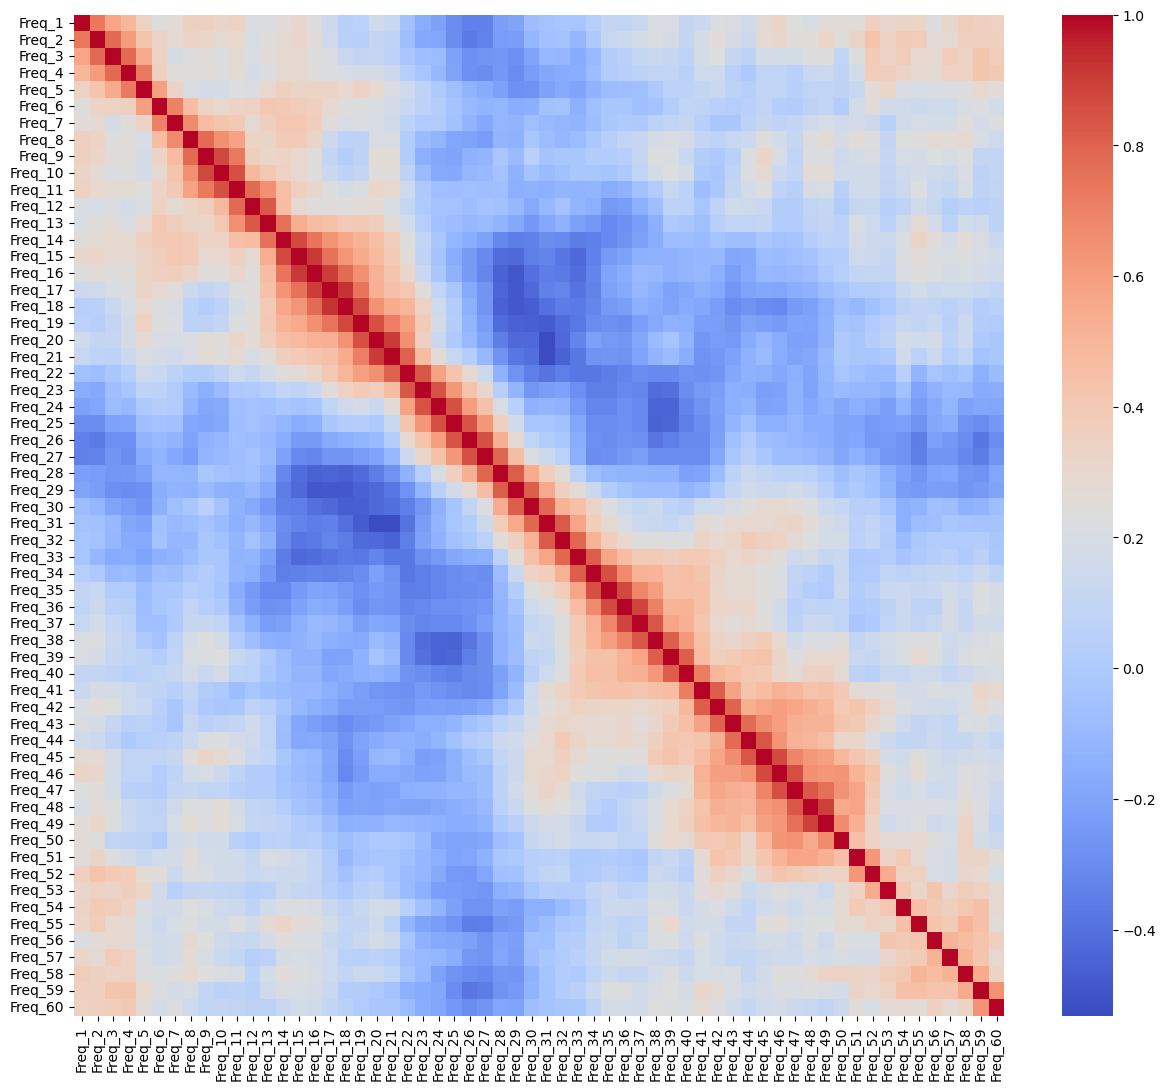

In [5]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(numeric_only=True) , cmap='coolwarm')

In [11]:
df['Label']=pd.get_dummies(df['Label'] , drop_first=True , dtype=np.int64)
np.abs(df.corr()['Label']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

# train , test split & scaling & pipe line

In [13]:
X=df.drop('Label' , axis=1)
y=df['Label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

operation=[('scale' ,scale) , ('knn' , knn)]
from sklearn.pipeline import Pipeline
pipe=Pipeline(operation)

In [65]:
from sklearn.model_selection import GridSearchCV
k_values=list(range(1,31))
param_grid={'knn__n_neighbors':k_values}
gride_model=GridSearchCV(pipe ,param_grid , cv=10 , scoring='accuracy')

In [67]:
gride_model.fit(X_train , y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [69]:
gride_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [23]:
pd.DataFrame(gride_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004796,0.001655,0.081852,0.085451,1,{'knn__n_neighbors': 1},0.894737,0.947368,0.684211,0.789474,0.736842,1.000000,0.947368,0.888889,0.833333,0.888889,0.861111,0.094596,1
1,0.003798,0.000400,0.059066,0.008978,2,{'knn__n_neighbors': 2},0.894737,0.894737,0.736842,0.842105,0.789474,0.894737,0.684211,0.833333,0.888889,0.833333,0.829240,0.069122,2
2,0.003798,0.000400,0.052769,0.007065,3,{'knn__n_neighbors': 3},0.947368,0.894737,0.736842,0.789474,0.736842,0.842105,0.789474,0.888889,0.777778,0.777778,0.818129,0.068020,3
3,0.004397,0.001199,0.054269,0.006014,4,{'knn__n_neighbors': 4},0.894737,0.842105,0.736842,0.631579,0.736842,0.842105,0.684211,0.777778,0.833333,0.722222,0.770175,0.078122,7
4,0.004296,0.001005,0.055070,0.006773,5,{'knn__n_neighbors': 5},0.894737,0.894737,0.684211,0.631579,0.736842,0.842105,0.684211,0.777778,0.888889,0.777778,0.781287,0.091804,4
5,0.004097,0.000294,0.056468,0.010209,6,{'knn__n_neighbors': 6},0.842105,0.842105,0.789474,0.631579,0.684211,0.842105,0.736842,0.777778,0.888889,0.777778,0.781287,0.075218,5
6,0.003696,0.000459,0.048574,0.005462,7,{'knn__n_neighbors': 7},0.842105,0.842105,0.684211,0.631579,0.631579,0.894737,0.789474,0.722222,0.944444,0.777778,0.776023,0.102190,6
7,0.003799,0.000401,0.049172,0.007166,8,{'knn__n_neighbors': 8},0.894737,0.789474,0.684211,0.684211,0.736842,0.789474,0.631579,0.722222,0.833333,0.777778,0.754386,0.074306,9
8,0.003998,0.000446,0.048370,0.004423,9,{'knn__n_neighbors': 9},0.894737,0.736842,0.684211,0.631579,0.684211,0.789474,0.736842,0.777778,0.777778,0.888889,0.760234,0.080820,8
9,0.004098,0.000300,0.048471,0.004253,10,{'knn__n_neighbors': 10},0.894737,0.736842,0.684211,0.578947,0.684211,0.842105,0.684211,0.722222,0.777778,0.777778,0.738304,0.085321,10


In [25]:
gride_model.cv_results_['mean_test_score']

array([0.86111111, 0.82923977, 0.81812865, 0.77017544, 0.78128655,
       0.78128655, 0.77602339, 0.75438596, 0.76023392, 0.73830409,
       0.71754386, 0.67368421, 0.70643275, 0.67397661, 0.71140351,
       0.68450292, 0.71169591, 0.69502924, 0.69532164, 0.7002924 ,
       0.70614035, 0.70526316, 0.70555556, 0.70555556, 0.7005848 ,
       0.68947368, 0.69473684, 0.68391813, 0.67865497, 0.66783626])

# model Evaluating 

Text(0, 0.5, 'Accuracy')

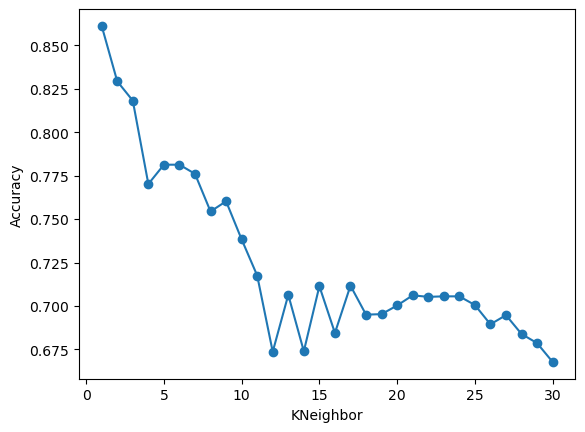

In [71]:
plt.plot(k_values, gride_model.cv_results_['mean_test_score'] , 'o-')
plt.xlabel('KNeighbor')
plt.ylabel('Accuracy')

In [31]:
y_pred=gride_model.predict(X_test)

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , RocCurveDisplay , PrecisionRecallDisplay

In [35]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



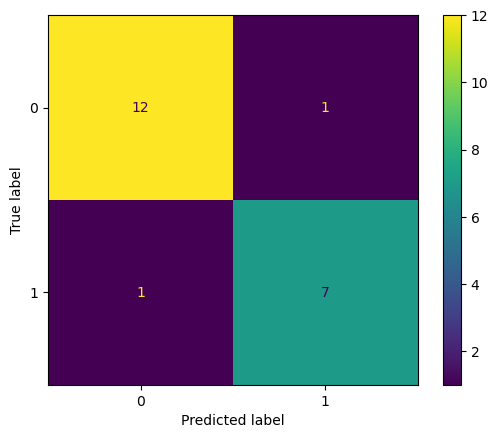

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

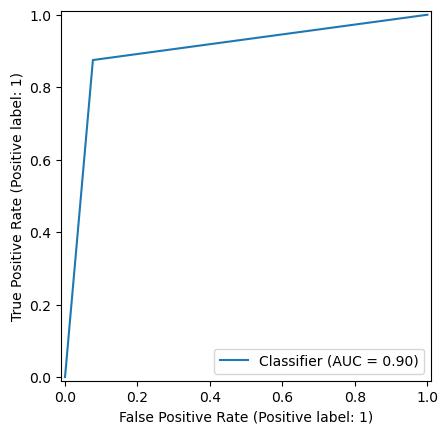

In [45]:
RocCurveDisplay.from_predictions(y_test , y_pred)

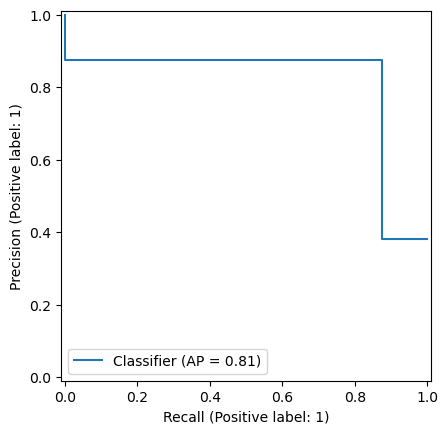

In [75]:
PrecisionRecallDisplay.from_predictions(y_test , y_pred)